In [2]:
import re
import os
import pickle
import math
import csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
%matplotlib inline

### Przekształcenie danych tekstowych w Bag of Words

In [3]:
tags_to_exclude = ['interp']
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().split('\n')

In [4]:
with open('../corpus/protestant_corpus.pickle', 'rb') as f:
    prot = pickle.load(f)

In [5]:
with open('../corpus/catolic_corpus.pickle', 'rb') as f:
    cats = pickle.load(f)

In [6]:
for id_, doc in cats.items():
    data = [item[0] for item in doc]
    if 'zaproszenie' in data:
        print(data)
        print('=='*25)

['Mam', '38', 'lat', '.', 'Pochodzę', 'z', 'rodziny', 'katolickiej', ',', 'wierzącej', 'i', 'praktykującej', '.', 'Moje', 'życie', 'przed', 'nawróceniem', 'było', 'piękne', ',', 'a', 'jednocześnie', 'pełne', 'bólu', 'i', 'cierpienia', '.', 'W', 'wieku', 'dwóch', 'lat', 'i', 'ośmiu', 'miesięcy', 'miała', 'm', 'wypadek', ',', 'w', 'którym', 'straciła', 'm', 'lewą', 'nogę', 'i', 'noszę', 'protezę', '.', 'Przeszła', 'm', 'trzy', 'operacje', ',', 'reamputację', ',', 'coroczne', 'zmiany', 'protezy', ',', 'rehabilitacje', ',', 'dużo', 'bólu', ',', 'wstydu', 'i', 'upokorzenia', ',', 'zwłaszcza', 'w', 'okresie', 'dojrzewania', '(', '.', '.', '.', ')', '.', 'A', 'jednak', 'zawsze', 'była', 'm', 'silna', ',', 'uśmiechnięta', ',', 'pełna', 'miłości', 'i', 'wiary', '.', 'Wyjechała', 'm', 'z', 'kraju', ',', 'mając', '21', 'lat', ',', 'i', 'przez', '14', 'lat', 'mieszkała', 'm', 'poza', 'Polską', ':', 'we', 'Francji', ',', 'Anglii', 'i', 'Chile', '.', 'Przez', 'cztery', 'i', 'pół', 'miesiąca', 'podró

In [7]:
for doc, content in prot.items():
    lemmatized = []
    for segment in content:
        if segment[2] != 'interp' and segment[1] not in stopwords:
            lemmatized.append(segment[1])
    with open(f'../corpus/lemmatized/protestanckie/{doc}.txt', 'w') as f:
        f.write(" ".join(lemmatized))

In [8]:
# klasyfikacja płci
def gender_classifier(doc):
    f, m = 0, 0
    for i, item in enumerate(doc):
        if 'aglt:sg' in item[2]:
            x = re.match(r'praet:sg:(\w{1,2}):', doc[i-1][2])
            if x and x.group(1) == 'f':
                f += 1
            elif x and x.group(1) == 'm1':
                m += 1
            else:
                continue
    if f > m:
        gender = 'K'
    elif m > f:
        gender = 'M'
    else:
        gender = 'UNKNOW'
    return gender

In [9]:
cats_gender = {}
for id_, doc in cats.items():
    cats_gender[id_] = gender_classifier(doc)

In [10]:
t = len(cats_gender.items())
m = list(cats_gender.values()).count("M")
k = list(cats_gender.values()).count("K")
u = list(cats_gender.values()).count("UNKNOW")
print(f'Total: {t}')
print(f'M: {m} ({round((m*100)/t, 2)}%)')
print(f'K: {k} ({round((k*100)/t, 2)}%)')
print(f'U: {u} ({round((u*100)/t, 2)}%)')

Total: 296
M: 89 (30.07%)
K: 194 (65.54%)
U: 13 (4.39%)


In [11]:
prot_gender = {}
for id_, doc in prot.items():
    prot_gender[id_] = gender_classifier(doc)

In [12]:
t = len(prot_gender.items())
m = list(prot_gender.values()).count("M")
k = list(prot_gender.values()).count("K")
u = list(prot_gender.values()).count("UNKNOW")
print(f'Total: {t}')
print(f'M: {m} ({round((m*100)/t, 2)}%)')
print(f'K: {k} ({round((k*100)/t, 2)}%)')
print(f'U: {u} ({round((u*100)/t, 2)}%)')

Total: 78
M: 37 (47.44%)
K: 41 (52.56%)
U: 0 (0.0%)


In [13]:
unknowns = []
for cats_id, gender in cats_gender.items():
    if gender == 'UNKNOW':
        unknowns.append(cats_id)

In [14]:
un = iter(unknowns)

In [15]:
next(un)

'124'

In [16]:
cats['196']

[('Kiedy', 'kiedy', 'comp'),
 ('się', 'się', 'qub'),
 ('modlimy', 'modlić', 'fin:pl:pri:imperf'),
 ('do', 'do', 'prep:gen'),
 ('świętych', 'święta', 'subst:pl:gen:f'),
 (',', ',', 'interp'),
 ('oddajemy', 'oddawać', 'fin:pl:pri:imperf'),
 ('cześć', 'cześć', 'subst:sg:nom:f'),
 ('Bogu', 'bóg', 'subst:sg:dat:m1'),
 ('.', '.', 'interp'),
 ('Wychwalamy', 'wychwalać', 'fin:pl:pri:imperf'),
 ('Go', 'go', 'subst:sg:nom:n'),
 (',', ',', 'interp'),
 ('czcząc', 'czcić', 'pcon:imperf'),
 ('największe', 'duży', 'adj:sg:nom:n:sup'),
 ('dzieła', 'dzieło', 'subst:sg:gen:n'),
 ('Jego', 'on', 'ppron3:sg:gen:m1:ter:akc:npraep'),
 ('łaski', 'łaska', 'subst:sg:gen:f'),
 ('.', '.', 'interp'),
 ('Sprawiamy', 'sprawiać', 'fin:pl:pri:imperf'),
 ('Bogu', 'bóg', 'subst:sg:dat:m1'),
 ('przyjemność', 'przyjemność', 'subst:sg:nom:f'),
 (',', ',', 'interp'),
 ('kiedy', 'kiedy', 'comp'),
 ('zwracamy', 'zwracać', 'fin:pl:pri:imperf'),
 ('się', 'się', 'qub'),
 ('z', 'z', 'prep:gen:nwok'),
 ('prośbą', 'prośba', 'subst:

In [21]:
prot_corpus = {}
for prot_nr, prot_segments in prot.items():
    prot_corpus[prot_nr] = [t[1] for t in prot_segments if t[2] not in tags_to_exclude]

In [22]:
cats_corpus = {}
for cats_nr, cats_segments in cats.items():
    cats_corpus[cats_nr] = [t[1] for t in cats_segments if t[2] not in tags_to_exclude]

In [23]:
to_delete = []
for doc_id, doc in cats_corpus.items():
    if len(doc) < 1:
        to_delete.append(doc_id)
for doc_id in to_delete:
    del cats_corpus[doc_id]

In [24]:
prot_docs_nr = len(prot_corpus.keys())
prot_tokens = sum([len(doc) for doc in prot_corpus.values()])
prot_lemmas = []
for doc in prot_corpus.values():
    for lemma in doc:
        prot_lemmas.append(lemma)
prot_lemmas = set(prot_lemmas)
prot_avg = prot_tokens / prot_docs_nr
prot_min = min([len(doc) for doc in prot_corpus.values()])
prot_max = max([len(doc) for doc in prot_corpus.values()])

In [25]:
cats_docs_nr = len(cats_corpus.keys())
cats_tokens = sum([len(doc) for doc in cats_corpus.values()])
cats_lemmas = []
for doc in cats_corpus.values():
    for lemma in doc:
        cats_lemmas.append(lemma)
cats_lemmas = set(cats_lemmas)
cats_avg = cats_tokens / cats_docs_nr
cats_min = min([len(doc) for doc in cats_corpus.values()])
cats_max = max([len(doc) for doc in cats_corpus.values()])

In [26]:
prot_bow = defaultdict(int)

In [27]:
for doc in prot_corpus.values():
    for token in doc:
        prot_bow[token] += 1

In [28]:
prot_bow

defaultdict(int,
            {'urodzić': 40,
             'być': 5574,
             'się': 1771,
             'w': 2040,
             'rodzina': 139,
             'ateistyczny': 2,
             'moi': 335,
             'rodzic': 64,
             'jednak': 128,
             'uważać': 24,
             'że': 1162,
             'oba': 6,
             'z': 1313,
             'siostra': 39,
             'mama': 193,
             'prawo': 4,
             'wybrać': 16,
             'swój': 165,
             'droga': 90,
             'nie': 1394,
             'można': 29,
             'coś': 116,
             'czego': 45,
             'znać': 61,
             'zdecydować': 19,
             'więc': 57,
             'chodzić': 66,
             'na': 1010,
             'lekcja': 7,
             'religia': 26,
             'do': 1045,
             'kościół': 190,
             'katolicki': 42,
             'lubić': 18,
             'te': 53,
             'bardziej': 55,
             'powód': 18,
   

In [29]:
cats_bow = defaultdict(int)

In [30]:
for doc in cats_corpus.values():
    for token in doc:
        cats_bow[token] += 1

In [31]:
cats_tokens

208192

### Wygenerowanie słów kluczowych

In [32]:
def compute_log_likelihood(o_11, o_21, corpus_c, corpus_r):    
    e_11 = (corpus_c * (o_11 + o_21)) / (corpus_c + corpus_r)
    e_21 = (corpus_r * (o_11 + o_21)) / (corpus_c + corpus_r)
    try:
        log_likelihood = 2 * ((o_11 * math.log(o_11 / e_11)) + (o_21 * math.log(o_21 / e_21)))
    except:
        log_likelihood = 0
    return log_likelihood

In [33]:
keywords_loglikelihood = {}
for keyword in cats_bow.keys():
    if prot_bow[keyword] == 0:
        continue
    log = compute_log_likelihood(o_11= cats_bow[keyword], o_21=prot_bow[keyword], corpus_c=cats_tokens, corpus_r=prot_tokens)
    if log > 0.05 and keyword not in stopwords:
        keywords_loglikelihood[keyword] = log

In [34]:
keyness_sorted = sorted(keywords_loglikelihood.items(), key=lambda kv: kv[1], reverse=True)

In [35]:
keyness_sorted

[('bóg', 189.96537160557182),
 ('Jezus', 173.59686864303455),
 ('Biblia', 164.62207487345458),
 ('życie', 161.31715918754713),
 ('zbór', 154.21134544391938),
 ('alkohol', 133.18575314418865),
 ('Chrystus', 112.45840623770972),
 ('rekolekcja', 101.59171121294332),
 ('czytać', 96.02388764538885),
 ('chrzest', 86.28217198525047),
 ('społeczność', 85.47511997004301),
 ('spowiedź', 80.5576209886085),
 ('pastor', 77.08497826090286),
 ('kościół', 73.50599993606374),
 ('nabożeństwo', 72.88464228607262),
 ('świadek', 71.07065627750498),
 ('chłopak', 70.67668796725673),
 ('papieros', 67.40224483406618),
 ('związek', 65.82480532593019),
 ('ośrodek', 64.50741135565399),
 ('więzienie', 57.31041400137453),
 ('czystość', 56.91921696587981),
 ('przyjąć', 56.78415124614952),
 ('pić', 54.68640601661642),
 ('zbawienie', 54.13623859787025),
 ('różaniec', 53.00516455703417),
 ('słowo', 52.7294309754474),
 ('chrześcijański', 52.08935460201916),
 ('zbawić', 50.759641748389726),
 ('ciąża', 50.2416156576502),


In [36]:
with open('../data/keywords_log-likelihood.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['keyword','Log-likelihood_score'])
    for row in keyness_sorted:
        csv_out.writerow(row)

In [37]:
cats_keywords = []
prot_keywords = []

In [38]:
for keyword, keyness in keyness_sorted:
    cat_score = (cats_bow[keyword] / cats_tokens) * 1000
    prot_score = (prot_bow[keyword] / prot_tokens) * 1000
    if keyword in stopwords:
        continue
    if cat_score > prot_score:
        cats_keywords.append((keyword, keyness, cat_score))
    else:
        prot_keywords.append((keyword, keyness, prot_score))

In [39]:
cats_keywords

[('rekolekcja', 101.59171121294332, 1.1239624961573933),
 ('spowiedź', 80.5576209886085, 0.8597832769750999),
 ('świadek', 71.07065627750498, 1.4265677835843837),
 ('chłopak', 70.67668796725673, 1.023094067015063),
 ('związek', 65.82480532593019, 0.9126191208115586),
 ('czystość', 56.91921696587981, 0.6148170919151552),
 ('różaniec', 53.00516455703417, 0.5379649554257608),
 ('ciąża', 50.2416156576502, 0.5571779895481094),
 ('odmawiać', 46.15368412032919, 0.5956040577928067),
 ('Maryja', 43.5416768218881, 0.605210574853981),
 ('modlitwa', 36.38796553332568, 2.68021826006763),
 ('ślub', 36.25931487239456, 0.8357669843221642),
 ('badanie', 35.530081834502816, 0.3890639409775592),
 ('sakrament', 34.974074218316375, 0.38426068244697204),
 ('intencja', 34.41867640471699, 0.3794574239163849),
 ('tydzień', 34.14423401116228, 1.1095527205656317),
 ('matka', 33.80658544466515, 0.7829311404857054),
 ('małżeństwo', 29.404429848038944, 0.8021441746080541),
 ('ksiądz', 27.080907964788786, 0.84057024

In [40]:
with open('../data/catolic_keywords_per1000.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['keyword','log-likelihood', 'score'])
    for row in cats_keywords:
        csv_out.writerow(row)

In [41]:
prot_keywords

[('bóg', 189.96537160557182, 12.589390107947903),
 ('Jezus', 173.59686864303455, 6.362672322375398),
 ('Biblia', 164.62207487345458, 1.2779726459471954),
 ('życie', 161.31715918754713, 9.829513010849173),
 ('zbór', 154.21134544391938, 0.829322674497648),
 ('alkohol', 133.18575314418865, 1.3595453680289311),
 ('Chrystus', 112.45840623770972, 1.7402180710770319),
 ('czytać', 96.02388764538885, 1.6450498953150066),
 ('chrzest', 86.28217198525047, 0.6797726840144656),
 ('społeczność', 85.47511997004301, 0.4758408788101259),
 ('pastor', 77.08497826090286, 0.4622454251298366),
 ('kościół', 73.50599993606374, 2.583136199254969),
 ('nabożeństwo', 72.88464228607262, 0.7613454060962015),
 ('papieros', 67.40224483406618, 0.5166272398509939),
 ('ośrodek', 64.50741135565399, 0.652581776653887),
 ('więzienie', 57.31041400137453, 0.38067270304810075),
 ('przyjąć', 56.78415124614952, 1.0876362944231448),
 ('pić', 54.68640601661642, 0.6253908692933083),
 ('zbawienie', 54.13623859787025, 0.5302226935312

In [42]:
with open('../data/evangelical_keywords_per1000.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['keyword','log-likelihood', 'score'])
    for row in prot_keywords:
        csv_out.writerow(row)

### Wygenerowanie kolokacji dla pierwszych 50 słów kluczowych

In [43]:
def loglikelihood(co_occ, node_freq, colocat_freq, tokens):
    a = co_occ
    b = colocat_freq - co_occ
    c = node_freq - co_occ
    d = tokens - (a + b + c)
    try:
        result = 2 * (a * math.log(a) + b * math.log(b) + c * math.log(c)
                      + d * math.log(d)
                      - (a + b) * math.log(a + b) - (a + c) * math.log(a + c)
                      - (b + d) * math.log(b + d) - (c + d) * math.log(c + d)
                      + (a + b + c + d) * math.log(a + b + c + d))
    except:
        result = None
    return result

In [44]:
def collocates_counter(span, corpus, keyword):
    collocates = defaultdict(int)
    for text in corpus.values():
        keyword_indexes = [i for i, token in enumerate(text) if token == keyword]
        if len(keyword_indexes) > 0:
            for kw_index in keyword_indexes:
                if kw_index >= span:
                    for c in text[kw_index-span:kw_index]:
                        collocates[c] += 1
                    for c in text[kw_index+1:kw_index+1+span]:
                        collocates[c] += 1
                else:
                    for c in text[:kw_index]:
                        collocates[c] += 1
                    for c in text[kw_index+1:kw_index+1+span]:
                        collocates[c] += 1
    return collocates

In [45]:
def get_collocates_list(node_keyword, corpus, span):
    node_keyword_colocates = collocates_counter(span=span, corpus=corpus, keyword=node_keyword)
    weighted_collocates = []
    for colocate, co_occurance in node_keyword_colocates.items():
        col_score = loglikelihood(co_occ=co_occurance,
                            node_freq=cats_bow[node_keyword],
                            colocat_freq=cats_bow[colocate],
                            tokens=cats_tokens)
        if col_score != None:
            weighted_collocates.append((colocate, col_score))
        else:
            pass
    return sorted(weighted_collocates, key=lambda x: x[1], reverse=True)

In [46]:
top_keywords = list(zip(*keyness_sorted))[0][:100]

In [30]:
span = 2
with pd.ExcelWriter('../data/collocations_loglikelihood.xlsx', engine='xlsxwriter') as writer:
    for node_keyword in top_keywords:
        df_prot = pd.DataFrame(get_collocates_list(node_keyword=node_keyword,
                                                   corpus=prot_corpus,
                                                   span=span),
                               columns=['prot_collcates', 'prot_loglikelihood'])
        df_cats = pd.DataFrame(get_collocates_list(node_keyword=node_keyword,
                                                   corpus=cats_corpus,
                                                   span=span),
                               columns=['cats_collcates', 'cats_loglikelihood'])
        df = pd.concat([df_prot, df_cats], axis=1)
        df.to_excel(writer, sheet_name=node_keyword, index=False)
writer.save()
writer.close()

### Wygenerowanie grafu kolokacji dla 15 najważniejszych słów kluczowych w poszczególnych korpusach

In [32]:
def collocates_without_stopwords(node_keyword, corpus, span, stopwords, min_ll):
    collocates = [(col[0], col[1]) for col in get_collocates_list(node_keyword=node_keyword, corpus=corpus, span=span)
                 if col[0] not in stopwords and col[1] >= min_ll]            
    return collocates

##### Korpus katolicki

In [33]:
def catolic_network(node_keywords, min_ll, span, firsts_cols, seconds_cols):
    G = nx.Graph()
    for node_keyword in node_keywords:
        G.add_node(node_keyword,
                   group='group_0',
                   score=cats_bow[node_keyword] / cats_tokens,
                   keyness=compute_log_likelihood(o_11= cats_bow[node_keyword], o_21=prot_bow[node_keyword], corpus_c=cats_tokens, corpus_r=prot_tokens))
    for node_keyword in node_keywords:
        collocates = collocates_without_stopwords(node_keyword=node_keyword, corpus=cats_corpus, stopwords=stopwords, span=span, min_ll=min_ll)[:firsts_cols]
        for coll, ll in collocates:
            if not G.has_node(coll):
                G.add_node(coll,
                           group='group_1',
                           score=cats_bow[coll] / cats_tokens,
                           keyness=compute_log_likelihood(o_11= cats_bow[coll], o_21=prot_bow[coll], corpus_c=cats_tokens, corpus_r=prot_tokens))
            G.add_edge(node_keyword, coll, weight=ll)
    second_edges= list(G.edges())
    for _, second_node in second_edges:
        second_colls = collocates_without_stopwords(node_keyword=second_node, corpus=cats_corpus, span=span, stopwords=stopwords, min_ll=min_ll)[:seconds_cols]
        for second_coll, ll in second_colls:
            if not G.has_node(second_coll):
                G.add_node(second_coll,
                           group='group_2',
                           score=cats_bow[second_coll] / cats_tokens,
                           keyness=compute_log_likelihood(o_11= cats_bow[second_coll], o_21=prot_bow[second_coll], corpus_c=cats_tokens, corpus_r=prot_tokens))
            G.add_edge(second_node, second_coll, weight=ll)
    return G

In [38]:
cats_keys = [x[0] for x in cats_keywords][:50]

In [74]:
G_cat = catolic_network(node_keywords=cats_keys, min_ll=15, span=5, firsts_cols=5, seconds_cols=0)

In [75]:
len(G_cat.nodes)

208

AttributeError: 'Graph' object has no attribute 'show'

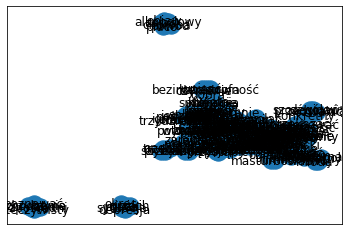

In [76]:
nx.draw_networkx(G_cat, with_labels=True)
G_cat.show()

In [77]:
nx.write_gexf(G_cat, "catholic_s5_ll15_f5_s0.gexf")

In [85]:
G_cat = catolic_network(node_keywords=cats_keys, min_ll=15, span=5)
nx.draw_networkx(G_cat, with_labels=True)
# graph_pos = nx.spring_layout(G_cat)
# nx.draw_networkx_nodes(G_cat, graph_pos, node_size=100, node_color='blue', alpha=0.3)
# nx.draw_networkx_edges(G_cat, graph_pos)
# nx.draw_networkx_labels(G_cat, graph_pos, font_size=10, font_family='sans-serif')
# plt.savefig("plot.png", format = "png", dpi = 1000)
plt.show()

KeyboardInterrupt: 

In [95]:
nx.write_gexf(G_cat, "uzdrowienie_choroba_lekarz_ll30_s3.gexf")

#### Korpus protestancki

In [35]:
def protestant_network(node_keywords, min_ll, span):
    G = nx.Graph()
    for node_keyword in node_keywords:
        G.add_node(node_keyword,
                   group='group_0',
                   score=prot_bow[node_keyword] / prot_tokens,
                   keyness=compute_log_likelihood(o_11= prot_bow[node_keyword], o_21=cats_bow[node_keyword], corpus_c=prot_tokens, corpus_r=cats_tokens))
    for node_keyword in node_keywords:
        collocates = collocates_without_stopwords(node_keyword=node_keyword, corpus=prot_corpus, stopwords=stopwords, span=span, min_ll=min_ll)
        for coll, ll in collocates:
            if not G.has_node(coll):
                G.add_node(coll,
                           group='group_1',
                           score=prot_bow[coll] / prot_tokens,
                           keyness=compute_log_likelihood(o_11= prot_bow[coll], o_21=cats_bow[coll], corpus_c=prot_tokens, corpus_r=cats_tokens))
            G.add_edge(node_keyword, coll, weight=ll)
    second_edges= list(G.edges())
    for _, second_node in second_edges:
        second_colls = collocates_without_stopwords(node_keyword=second_node, corpus=prot_corpus, span=span, stopwords=stopwords, min_ll=min_ll)
        for second_coll, ll in second_colls:
            if not G.has_node(second_coll):
                G.add_node(second_coll,
                           group='group_2',
                           score=prot_bow[second_coll] / prot_tokens,
                           keyness=compute_log_likelihood(o_11= prot_bow[second_coll], o_21=cats_bow[second_coll], corpus_c=prot_tokens, corpus_r=cats_tokens))
            G.add_edge(second_node, second_coll, weight=ll)
    return G

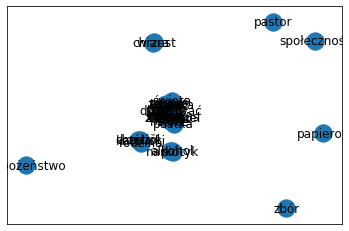

In [42]:
G_prot = protestant_network(node_keywords=['bóg', 'Jezus', 'Biblia', 'życie', 'zbór', 'alkohol', 'Chrystus', 'czytać', 'chrzest', 'społeczność', 'pastor', 'kościół', 'nabożeństwo', 'papieros'], min_ll=80, span=3)
nx.draw_networkx(G_prot, with_labels=True)
plt.show()

In [43]:
nx.write_gexf(G_prot, "pierwsze15_ll80_s3.gexf")

In [35]:
compute_log_likelihood(o_11=cats_bow['czystość'] , o_21=prot_bow['czystość'], corpus_c=cats_tokens, corpus_r=prot_tokens)

56.91921696587981

In [56]:
def specify_prov(k):
    cat_score = (cats_bow[k] / cats_tokens) * 1000
    prot_score = (prot_bow[k] / prot_tokens) * 1000
    if cat_score > prot_score:
        return 'catholic'
    else:
        return 'protestant'

In [74]:
min_ll=30
span=3
top_keywords = list(zip(*keyness_sorted))[0][:100]

In [75]:
G = nx.Graph()
for node_keyword in top_keywords:
    keyness=compute_log_likelihood(o_11= prot_bow[node_keyword],
                                   o_21=cats_bow[node_keyword],
                                   corpus_c=prot_tokens,
                                   corpus_r=cats_tokens)
    G.add_node(node_keyword,
               group='group_0',
               prov=specify_prov(node_keyword),
               keyness=keyness
               )
for node_keyword in top_keywords:
    collocates = collocates_without_stopwords(node_keyword=node_keyword, corpus=prot_corpus, stopwords=stopwords, span=span, min_ll=min_ll)
    for coll, ll in collocates:
        if not G.has_node(coll):
            G.add_node(coll,
                       group='group_1',
                       prov=specify_prov(coll),
                       keyness=compute_log_likelihood(o_11= prot_bow[coll], o_21=cats_bow[coll], corpus_c=prot_tokens, corpus_r=cats_tokens))
        G.add_edge(node_keyword, coll, weight=ll)
second_edges= list(G.edges())
for _, second_node in second_edges:
    second_colls = collocates_without_stopwords(node_keyword=second_node, corpus=prot_corpus, span=span, stopwords=stopwords, min_ll=min_ll)
    for second_coll, ll in second_colls:
        if not G.has_node(second_coll):
            G.add_node(second_coll,
                       group='group_2',
                       prov=specify_prov(second_coll),
                       keyness=compute_log_likelihood(o_11= prot_bow[second_coll], o_21=cats_bow[second_coll], corpus_c=prot_tokens, corpus_r=cats_tokens))
        G.add_edge(second_node, second_coll, weight=ll)

In [76]:
G.edges

EdgeView([('bóg', 'słowo'), ('bóg', 'żywy'), ('bóg', 'życie'), ('bóg', 'dziękować'), ('bóg', 'mówić'), ('bóg', 'Pan'), ('bóg', 'czytać'), ('bóg', 'prosić'), ('bóg', 'bóg'), ('bóg', 'wołać'), ('bóg', 'zmienić'), ('bóg', 'chwała'), ('bóg', 'kochać'), ('bóg', 'istnieć'), ('bóg', 'zacząć'), ('bóg', 'dać'), ('bóg', 'cudowny'), ('bóg', 'wierzyć'), ('bóg', 'podobać'), ('bóg', 'Biblia'), ('bóg', 'poznawać'), ('bóg', 'wiedzieć'), ('bóg', 'realny'), ('bóg', 'opowiadać'), ('bóg', 'odpowiedzieć'), ('bóg', 'miłość'), ('bóg', 'pokazać'), ('bóg', 'ojciec'), ('bóg', 'oddać'), ('bóg', 'serce'), ('bóg', 'uwierzyć'), ('bóg', 'pomoc'), ('bóg', 'prawdziwy'), ('bóg', 'sprawić'), ('bóg', 'swój'), ('bóg', 'służyć'), ('bóg', 'szukać'), ('bóg', 'zrozumieć'), ('bóg', 'człowiek'), ('bóg', 'modlić'), ('bóg', 'moc'), ('bóg', 'chcieć'), ('bóg', 'móc'), ('Jezus', 'Pan'), ('Jezus', 'życie'), ('Jezus', 'przyjąć'), ('Jezus', 'zbawiciel'), ('Jezus', 'serce'), ('Jezus', 'żyć'), ('Jezus', 'swój'), ('Jezus', 'syn'), ('Jezus

In [77]:
nx.write_gexf(G, "pierwsze50_s3_ll30.gexf")

### Notatki

In [33]:
collocates_without_stopwords(node_keyword="niebo", corpus=prot_corpus, stopwords=stopwords, span=5, min_ll=20)

[('piekło', 35.33956601563841),
 ('człowiek', 26.364326301962137),
 ('wieczny', 23.889458999969065)]

In [36]:
collocates_without_stopwords(node_keyword="czytać", corpus=cats_corpus, stopwords=stopwords, span=5, min_ll=20)

[('świadectwo', 116.51038834545761),
 ('Biblia', 85.62321946304291),
 ('książka', 81.50248404406011),
 ('pismo', 78.19698798749596),
 ('zacząć', 76.41747120022774),
 ('święta', 65.25739072356373),
 ('czytać', 50.47009313199669),
 ('czas', 46.68212795443833),
 ('słuchać', 44.371425992809236),
 ('różny', 36.40365427732468),
 ('raz', 33.40396694652736),
 ('historia', 29.34097638260573),
 ('jednorazowy', 27.396054186858237),
 ('modlić', 25.553088049404323),
 ('chodzić', 23.663408271968365),
 ('czytanie', 21.68527041375637),
 ('opowieść', 21.68527041375637),
 ('codziennie', 21.40806146711111),
 ('muzyka', 21.212740674614906),
 ('artykuł', 20.0608120393008),
 ('decyzja', 20.046433688141406)]

In [38]:
collocates_without_stopwords(node_keyword='czystość', corpus=cats_corpus, stopwords=stopwords, span=5, min_ll=20)

[('żyć', 184.19390571210533),
 ('przedmałżeński', 169.92319300305098),
 ('ślub', 164.11020835395902),
 ('wytrwać', 90.9222165569663),
 ('zachowanie', 66.84861236810684),
 ('walka', 58.89559795707464),
 ('chcieć', 51.532580201514065),
 ('trwanie', 49.72259325068444),
 ('zachować', 41.2993067484349),
 ('czystość', 40.72137890569866),
 ('dochować', 37.70822531916201),
 ('bóg', 36.0599532565102),
 ('postawić', 32.90767142456025),
 ('pole', 31.554591715335846),
 ('odzyskać', 30.40264410432428),
 ('prosić', 29.21966470219195),
 ('walczyć', 28.930346813984215),
 ('wnieść', 25.790263607166708),
 ('życie', 25.441201568581164),
 ('problem', 25.254246805794537),
 ('swój', 24.584273564629257),
 ('mieszkanie', 23.487474764697254),
 ('przemieniać', 22.881653568707407),
 ('własny', 21.32481916155666),
 ('dar', 20.68258774559945),
 ('utracić', 20.618040401488543)]

## Współczynnik częstości

In [18]:
cats_words = ['chłopak', 'związek', 'czystość', 'ciąża', 'małżeństwo', 'poród', 'dziewczyna', 'seks', 'małżeński', 'ukochana', 'łóżko', 'przytulić', 'zakochać', 'rodzinny', 'kobieta']

In [19]:
df_cats = pd.DataFrame(columns=['Słowo kluczowe', 'Ilość wystąpień w korpusie katolickim', 'Ilość wystąpień w korpusie katolickim w przeliczeniu na 1000 słów', 'Ilość wystąpień w korpusie protestanckim', 'Ilość wystąpień w korpusie protestanckim w przeliczeniu na 1000 słów', 'różnica'])

In [20]:
df_cats.set_index('Słowo kluczowe')

,Ilość wystąpień w korpusie katolickim,Ilość wystąpień w korpusie katolickim w przeliczeniu na 1000 słów,Ilość wystąpień w korpusie protestanckim,Ilość wystąpień w korpusie protestanckim w przeliczeniu na 1000 słów,różnica
Słowo kluczowe,,,,,


In [23]:
for word in cats_words:
    df_cats = df_cats.append({
        'Słowo kluczowe' : word,
        'Ilość wystąpień w korpusie katolickim': cats_bow[word],
        'Ilość wystąpień w korpusie katolickim w przeliczeniu na 1000 słów' : round(cats_bow[word]/cats_tokens * 1000, 2),
        'Ilość wystąpień w korpusie protestanckim' : prot_bow[word],
        'Ilość wystąpień w korpusie protestanckim w przeliczeniu na 1000 słów' : round(prot_bow[word]/prot_tokens * 1000, 2),
        'różnica' :  round((cats_bow[word]/cats_tokens * 1000) - (prot_bow[word]/prot_tokens * 1000), 2)      
    }, ignore_index=True)

In [24]:
df_cats.sort_values(by=['różnica'], ascending=False, inplace=True)

In [25]:
df_cats

,Słowo kluczowe,Ilość wystąpień w korpusie katolickim,Ilość wystąpień w korpusie katolickim w przeliczeniu na 1000 słów,Ilość wystąpień w korpusie protestanckim,Ilość wystąpień w korpusie protestanckim w przeliczeniu na 1000 słów,różnica
0,chłopak,213,1.02,11,0.15,0.87
1,związek,190,0.91,9,0.12,0.79
2,czystość,128,0.61,3,0.04,0.57
4,małżeństwo,167,0.80,19,0.26,0.54
3,ciąża,116,0.56,3,0.04,0.52
6,dziewczyna,106,0.51,12,0.16,0.35
7,seks,68,0.33,6,0.08,0.25
5,poród,44,0.21,1,0.01,0.20
8,małżeński,44,0.21,5,0.07,0.14
10,łóżko,54,0.26,9,0.12,0.14


In [34]:
prot_words = ['alkohol', 'papieros', 'pić', 'palenie', 'picie', 'alkoholik', 'kac', 'narkotyk', 'więzienie', 'wyrok', 'karny']

In [35]:
df_prot = pd.DataFrame(columns=['Słowo kluczowe', 'Ilość wystąpień w korpusie katolickim', 'Ilość wystąpień w korpusie katolickim w przeliczeniu na 1000 słów', 'Ilość wystąpień w korpusie protestanckim', 'Ilość wystąpień w korpusie protestanckim w przeliczeniu na 1000 słów', 'różnica'])

In [36]:
df_prot.set_index('Słowo kluczowe')

,Ilość wystąpień w korpusie katolickim,Ilość wystąpień w korpusie katolickim w przeliczeniu na 1000 słów,Ilość wystąpień w korpusie protestanckim,Ilość wystąpień w korpusie protestanckim w przeliczeniu na 1000 słów,różnica
Słowo kluczowe,,,,,


In [37]:
for word in prot_words:
    df_prot = df_prot.append({
        'Słowo kluczowe' : word,
        'Ilość wystąpień w korpusie katolickim': cats_bow[word],
        'Ilość wystąpień w korpusie katolickim w przeliczeniu na 1000 słów' : round(cats_bow[word]/cats_tokens * 1000, 2),
        'Ilość wystąpień w korpusie protestanckim' : prot_bow[word],
        'Ilość wystąpień w korpusie protestanckim w przeliczeniu na 1000 słów' : round(prot_bow[word]/prot_tokens * 1000, 2),
        'różnica' :  round((prot_bow[word]/prot_tokens * 1000) - (cats_bow[word]/cats_tokens * 1000), 2)      
    }, ignore_index=True)

In [38]:
df_prot.sort_values(by=['różnica'], ascending=False, inplace=True)

In [39]:
df_prot

,Słowo kluczowe,Ilość wystąpień w korpusie katolickim,Ilość wystąpień w korpusie katolickim w przeliczeniu na 1000 słów,Ilość wystąpień w korpusie protestanckim,Ilość wystąpień w korpusie protestanckim w przeliczeniu na 1000 słów,różnica
0,alkohol,36,0.17,100,1.36,1.19
2,pić,20,0.10,46,0.63,0.53
1,papieros,7,0.03,38,0.52,0.48
7,narkotyk,19,0.09,34,0.46,0.37
8,więzienie,3,0.01,28,0.38,0.37
3,palenie,4,0.02,15,0.20,0.18
4,picie,4,0.02,15,0.20,0.18
9,wyrok,4,0.02,15,0.20,0.18
5,alkoholik,8,0.04,14,0.19,0.15
10,karny,1,0.00,8,0.11,0.10


In [33]:
prot_bow['narkotyk']

34

In [40]:
df_prot.to_excel('grzech_tabelka.xlsx')

## Konkordancje

In [19]:
def concordance(keyword, span, corpus, corpus_path ='../corpus/swiadectwa_protestanckie/'):
    df = pd.DataFrame(columns=['Lewy kontekst', 'Słowo kluczowe', 'Prawy kontekst', 'Plik'])
    for file in [f for f in os.listdir(corpus_path) if f.endswith('.txt')]:
        document = corpus[file.split('.')[0]]
        lemmas = [lemma for token, lemma, tag in document]
        tokens = [token for token, lemma, tag in document]
        indices = [i for i, x in enumerate(lemmas) if x == keyword]
        if len(indices) > 0:
            pattern = ''
            for w in set([tokens[i] for i in indices]):
                pattern += f"\\b{w}.*?\\b|"
            pattern = pattern[:-1]
            with open(os.path.join(corpus_path, file), 'r') as f:
                text = f.read()
            for m in re.finditer(pattern, text):
                if m.start() <= span:
                    left_range = text[:m.start()]
                else:
                    left_range = text[m.start()-span:m.start()]
                if len(text) - m.end() <= span:
                    right_range = text[m.end():]
                else:
                    right_range = text[m.end():m.end()+span+1]
                df = df.append({
                    'Lewy kontekst' : left_range,
                    'Słowo kluczowe' : m.group(0),
                    'Prawy kontekst' : right_range,
                    'Plik' : file
                }, ignore_index=True)
        else:
            continue
    return df

In [20]:
cat_words = ['chłopak', 'związek', 'czystość', 'ciąża', 'małżeństwo', 'poród', 'dziewczyna', 'seks', 'małżeński', 'ukochana', 'łóżko', 'przytulić', 'zakochać', 'rodzinny', 'kobieta']

In [22]:
with open('../corpus/catolic_corpus.pickle', 'rb') as f:
    catolic_corpus = pickle.load(f)

with open('../corpus/protestant_corpus.pickle', 'rb') as f:
    protestant_corpus = pickle.load(f)

In [23]:
writer = pd.ExcelWriter('../data/konkordancje_katolickie.xlsx', engine = 'xlsxwriter')
for word in cat_words:
    df = concordance(keyword=word, span=150, corpus=catolic_corpus, corpus_path ='../corpus/swiadectwa_katolickie/')
    df.to_excel(writer, sheet_name=word)
writer.save()
writer.close()

In [24]:
prot_words = ['alkohol', 'papieros', 'pić', 'palenie', 'picie', 'alkoholik', 'kac', 'narkotyki', 'więzienie', 'wyrok', 'karny', 'miłosierdzie']

In [25]:
writer = pd.ExcelWriter('../data/konkordancje_protestanckie.xlsx', engine = 'xlsxwriter')
for word in prot_words:
    df = concordance(keyword=word, span=150, corpus=protestant_corpus, corpus_path ='../corpus/swiadectwa_protestanckie/')
    df.to_excel(writer, sheet_name=word)
writer.save()
writer.close()

In [160]:
drugs.to_excel('narkotyk.xlsx')

In [45]:
concordance(keyword='narkotyk', span=80, corpus=protestant_corpus, corpus_path ='../corpus/swiadectwa_protestanckie/')

,Lewy kontekst,Słowo kluczowe,Prawy kontekst,Plik
0,szczęśliwy. Niestety to był dopiero początek....,narkotyki,były bardziej przyjemne... a skoro wszyscy pr...,048.txt
1,oby to niebo. Kiedy mój przyjaciel poszedł do ...,narkotyków,", zobaczyłem, że to nie przelewki. Postanowiłe...",048.txt
2,iu dziać. Już w średniej szkole zaczęły się im...,narkotyki,. Kiedy zaczęłam studia potrafiłam z jednego k...,076.txt
3,o łasce.\nMój upadek zaczął się w wieku 16 lat...,narkotyków,", była to marihuana i poczułem że jestem kimś ...",070.txt
4,"ależniony od amfetaminy, heroiny, leków psycho...",narkotyki,"albo produkty do ich produkcji kłamałem, krad...",070.txt
5,"erapie i ośrodki i detoksy, nie było żadnych e...",narkotyków,dokonałem rozboju i trafiłem za to do więzien...,070.txt
6,na temat uzależnienia jednak moje myślenie ni...,narkotykach,i o tym co w świecie na mnie czeka.\nPewnego ...,070.txt
7,dalej robiłem to co dotychczas. Doszedłem do m...,narkotyk,"potrzebowałem na to kilku godzin, moje ręce b...",070.txt
8,ru gdy tak siedziałem i mijała kolejna godzina...,narkotyku,kiedy krew spływała mi po łokciach na spodnie...,070.txt
9,ardzo mnie to zirytowało i szydziliśmy z niego...,narkotyki,", pił alkohol, kłócił się z żoną i to wszystko...",014.txt


In [23]:
# klasyfikacja płci
def gender_classifier(doc):
    f, m = 0, 0
    for i, item in enumerate(doc):
        if 'aglt:sg' in item[2]:
            x = re.match(r'praet:sg:(\w{1,2}):', doc[i-1][2])
            if x and x.group(1) == 'f':
                f += 1
            elif x and x.group(1) == 'm1':
                m += 1
            else:
                continue
    if f > m:
        gender = 'K'
    elif m > f:
        gender = 'M'
    else:
        gender = 'UNKNOW'
    return gender

In [24]:
cats_gender = {}
for id_, doc in cats.items():
    cats_gender[id_] = gender_classifier(doc)

In [25]:
t = len(cats_gender.items())
m = list(cats_gender.values()).count("M")
k = list(cats_gender.values()).count("K")
u = list(cats_gender.values()).count("UNKNOW")
print(f'Total: {t}')
print(f'M: {m} ({round((m*100)/t, 2)}%)')
print(f'K: {k} ({round((k*100)/t, 2)}%)')
print(f'U: {u} ({round((u*100)/t, 2)}%)')

Total: 296
M: 89 (30.07%)
K: 194 (65.54%)
U: 13 (4.39%)


In [26]:
prot_gender = {}
for id_, doc in prot.items():
    prot_gender[id_] = gender_classifier(doc)

In [27]:
t = len(prot_gender.items())
m = list(prot_gender.values()).count("M")
k = list(prot_gender.values()).count("K")
u = list(prot_gender.values()).count("UNKNOW")
print(f'Total: {t}')
print(f'M: {m} ({round((m*100)/t, 2)}%)')
print(f'K: {k} ({round((k*100)/t, 2)}%)')
print(f'U: {u} ({round((u*100)/t, 2)}%)')

Total: 78
M: 37 (47.44%)
K: 41 (52.56%)
U: 0 (0.0%)


In [38]:
for token, lemma, tag in cats['008']:
    print(token)

Moje
życie
do
pewnego
momentu
było
bardzo
szczęśliwe
i
przeciętne
-
szkoła
,
studia
,
praca
.
W
końcu
poznała
m
mojego
wspaniałego
Męża
,
zatem
naturalną
koleją
rzeczy
był
ślub
,
a
po
jakimś
czasie
zobaczyli
śmy
na
teście
ciążowym
upragnione
dwie
kreski
.
I
znów
-
książkowa
ciąża
,
wybieranie
imienia
i
wyprawki
.
Aż
do
do
29
tygodnia
,
kiedy
wszystko
się
posypało
.
.
.
Trafiła
m
do
szpitala
-
wysokie
ciśnienie
,
obrzęki
,
inne
nieciekawe
wyniki
badań
.
Miała
m
zostać
trzy
dni
w
szpitalu
,
a
wyszło
z
tego
5
tygodni
walki
o
każdy
dzień
w
"
dwupaku
"
,
walki
o
życie
mojego
dziecka
i
też
moje
.
Ciągle
badania
,
pobieranie
krwi
dwa
razy
dziennie
,
zastrzyki
,
leki
,
KTG
trzy
razy
dziennie
po
kilka
godzin
.
Strach
mojego
męża
o
mnie
i
dziecko
.
I
w
tym
wszystkim
:
ja
i
moja
wiara
.
Zawsze
była
m
osobą
"
wierzącą
,
praktykującą
"
.
Msza
nie
tylko
od
święta
,
regularna
spowiedź
,
ale
z
drugiej
strony
nigdy
nie
dbała
m
o
pogłębienie
życia
duchowego
,
o
formację
.
I
nagle
-
jak
trwoga
to
do
Boga

In [39]:
gender_classifier(cats['008'])

'K'